In [1]:
library(tidyverse)

parse_deltatime <- function(column) {
    
    parse_subfield <- function (x) {
        if (grepl('ms', x)) {
            x <- gsub('ms', '', x) %>% as.numeric
            x <- x / 1000
        } else if (grepl('s', x)) {
            x <- gsub('s', '', x) %>% as.numeric
        } else if (grepl('m', x)) {
            x <- gsub('m', '', x) %>% as.numeric
            x <- x * 60
        } else if (grepl('h', x)) {
            x <- gsub('h', '', x) %>% as.numeric
            x <- x * 3600
        } else {
            x <- NA
        }

        return(x)
        
    }
    
    strsplit(column, ' ') %>% lapply(function(x) lapply(x, parse_subfield) %>% unlist) %>% lapply(sum) %>% unlist
   
}
                                     
parse_memory <- function(column) {
    
    parse_subfield <- function (x) {
        if (grepl('MB', x)) {
            x <- gsub(' MB', '', x) %>% as.numeric
        } else if (grepl(' GB', x)) {
            x <- gsub(' GB', '', x) %>% as.numeric
            x <- x * 1000
        } else {
            x <- NA
        }

        return(x)
        
    }
    
    lapply(column, parse_subfield) %>% unlist
   
}

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()


In [2]:
trace <- read_tsv('../results/benchmark/trace.txt') %>%
    mutate(time_s = parse_deltatime(realtime),
           memory_mb = parse_memory(vmem),
           task = gsub(' .+', '', name)) 

Parsed with column specification:
cols(
  task_id = col_integer(),
  hash = col_character(),
  native_id = col_integer(),
  name = col_character(),
  status = col_character(),
  exit = col_character(),
  submit = col_datetime(format = ""),
  duration = col_character(),
  realtime = col_character(),
  `%cpu` = col_character(),
  rss = col_character(),
  vmem = col_character(),
  rchar = col_character(),
  wchar = col_character()
)


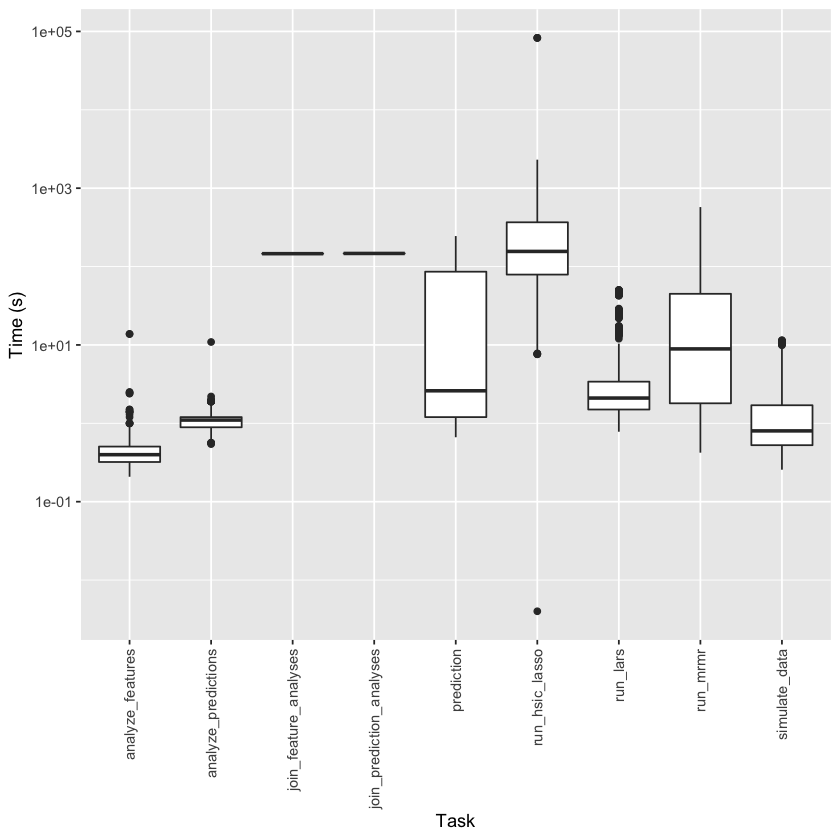

In [3]:
trace %>%
    filter(!is.na(time_s)) %>%
    ggplot(aes(x = task, y = time_s)) +
        geom_boxplot() +
        scale_y_log10() +
        labs(y = 'Time (s)', x = 'Task') +
        theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5),
              legend.position = 'bottom')

Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”

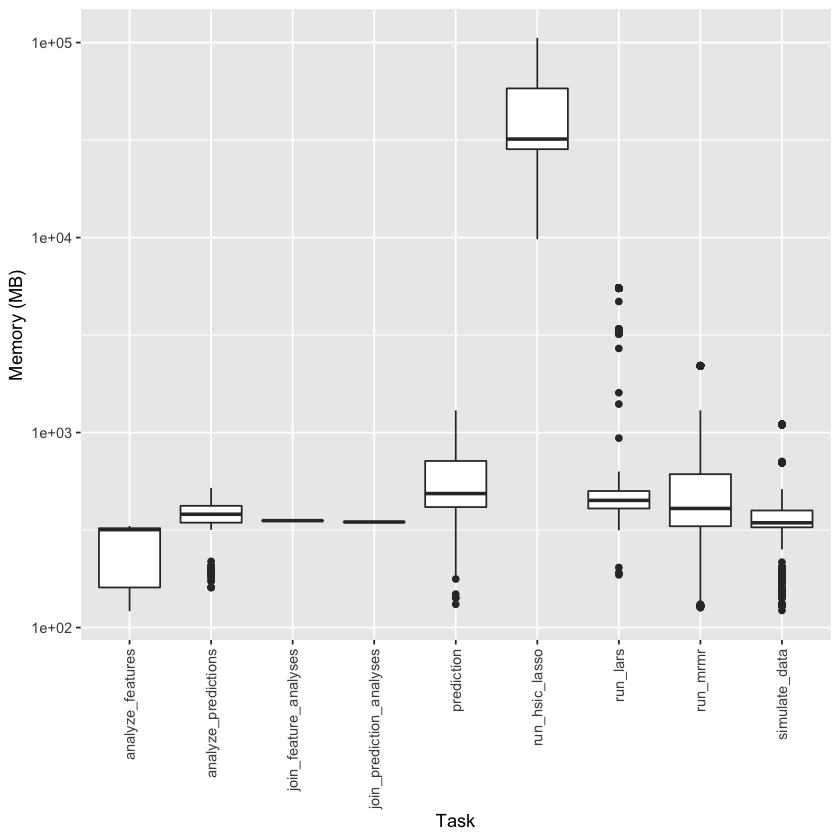

In [4]:
trace %>%
    filter(!is.na(time_s)) %>%
    ggplot(aes(x = task, y = memory_mb)) +
        geom_boxplot() +
        scale_y_log10() +
        labs(y = 'Memory (MB)', x = 'Task') +
        theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5),
              legend.position = 'bottom')